# Homework 3

Cassandra Maldonado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

### 1. Data Processing

a) Import the data from the website directly

In [2]:
adult_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                       header=None, skipinitialspace=True)

b) Create column names based on the dataset description

In [3]:
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", 
                "marital-status", "occupation", "relationship", "race", 
                "sex", "capital-gain", "capital-loss", "hours-per-week", 
                "native-country", "salary"]

adult_df.columns = column_names

In [4]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


c) Check your dataframe shape to verify that you have the correct # of rows and columns. 
You should get a shape of: (32561, 15)

In [5]:
print("Dataset shape:", adult_df.shape)

Dataset shape: (32561, 15)


d) Drop the 3rd column from the data (it is referred to as "fnlwgt" on UCI's website and is not necessary in this homework)

In [6]:
adult_df = adult_df.drop('fnlwgt', axis=1)

In [7]:
adult_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


e) Note: There are random values of  '?' that show up in the data - this is fine! These just refer to "unknown" and can be left as is. This data has no true NA values, so no need to check.

f) Use the .replace() method to make the following changes to the "salary" column:

"<=50K" should become 0

">50K" should become 1

Note: This step is essential to calculate the ROC_AUC score in model evaluation steps.

In [15]:
adult_df['salary'] = adult_df['salary'].replace({'<=50K': 0, '>50K': 1})

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_45959/909945443.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adult_df['salary'] = adult_df['salary'].replace({'<=50K': 0, '>50K': 1})


In [16]:
print(adult_df['salary'].value_counts())

salary
0    24720
1     7841
Name: count, dtype: int64


g) Create your X dataframe (just your predictors). It should include every feature except for the target variable which is "salary".

You should have the following shape: (32561, 13)

In [17]:
X = adult_df.drop('salary', axis=1)

In [18]:
print("X shape:", X.shape)

X shape: (32561, 13)


h) Create your y dataframe (just your target variable). It should only be "salary".

You should have the following shape: (32561, )

The values should only be 0 and 1.

In [19]:
y = adult_df['salary']

print("y shape:", y.shape)

y shape: (32561,)


In [20]:
#Check values y
print("y values:", y.unique())

y values: [0 1]


i) For this homework we will try converting columns with factors to separate columns (i.e. one-hot encoding). It is not necessary for trees, but can be a very powerful tool to use. There are a variety of ways to do this, but we can use Pandas built-in method .get_dummies(). Pandas will automatically split out columns that are categorical. For now, just run across your full X dataframe.

Your updated X dataframe should have the following shape: (32561, 107)

In [21]:
X_encoded = pd.get_dummies(X)
print("X_encoded shape:", X_encoded.shape)

X_encoded shape: (32561, 107)


j) Split data into train / test set using an 70/30 split. Verify that you have the same number of columns in your X_train and X_test.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Verifying same number of columns:", X_train.shape[1] == X_test.shape[1])

X_train shape: (22792, 107)
X_test shape: (9769, 107)
Verifying same number of columns: True


### 2. Random Forest Classifier - Base Model:

a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.

In [23]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

b) Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [25]:
# Predicted probabilities
y_prob = rf_model.predict_proba(X_test)[:, 1]
# Predicted classes
y_pred = rf_model.predict(X_test)

print("Predicted probabilities shape:", y_prob.shape)
print("Predicted classes shape:", y_pred.shape)

Predicted probabilities shape: (9769,)
Predicted classes shape: (9769,)


c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[6834  621]
 [ 882 1432]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7455
           1       0.70      0.62      0.66      2314

    accuracy                           0.85      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



d) Calculate the AUC score.

In [27]:
auc_score = roc_auc_score(y_test, y_prob)
print(f"\nAUC Score: {auc_score:.4f}")


AUC Score: 0.8889


e) Identify the top 5 features. Feel free to print a list OR to make a plot.

In [28]:
feature_importances = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_model.feature_importances_
})
top_features = feature_importances.sort_values('importance', ascending=False).head(5)

print("\nTop 5 Features:")
print(top_features)


Top 5 Features:
                              feature  importance
0                                 age    0.220496
4                      hours-per-week    0.113624
2                        capital-gain    0.098573
32  marital-status_Married-civ-spouse    0.076897
1                       education-num    0.067227


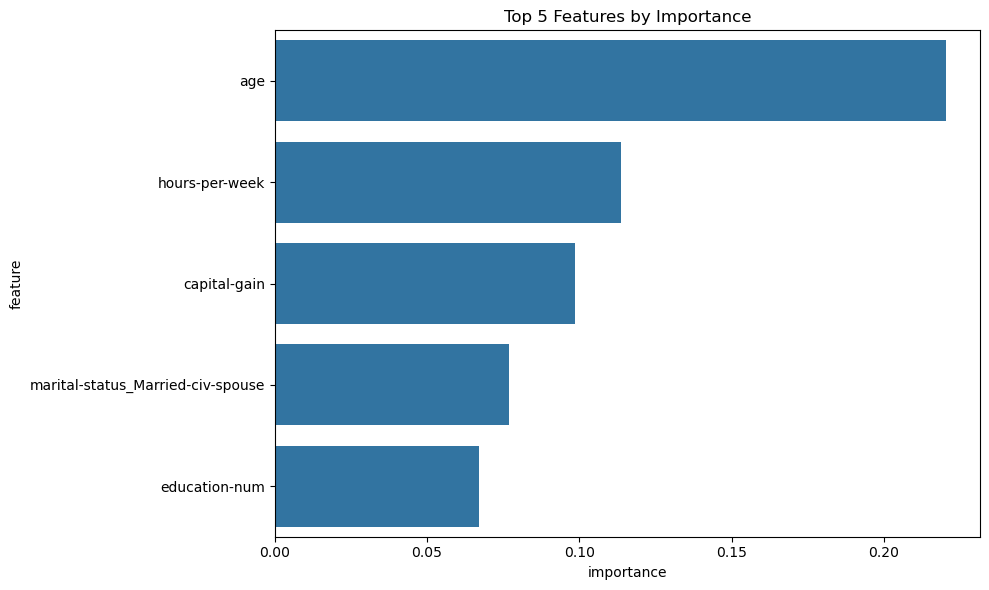

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Top 5 Features by Importance')
plt.tight_layout()
plt.show()

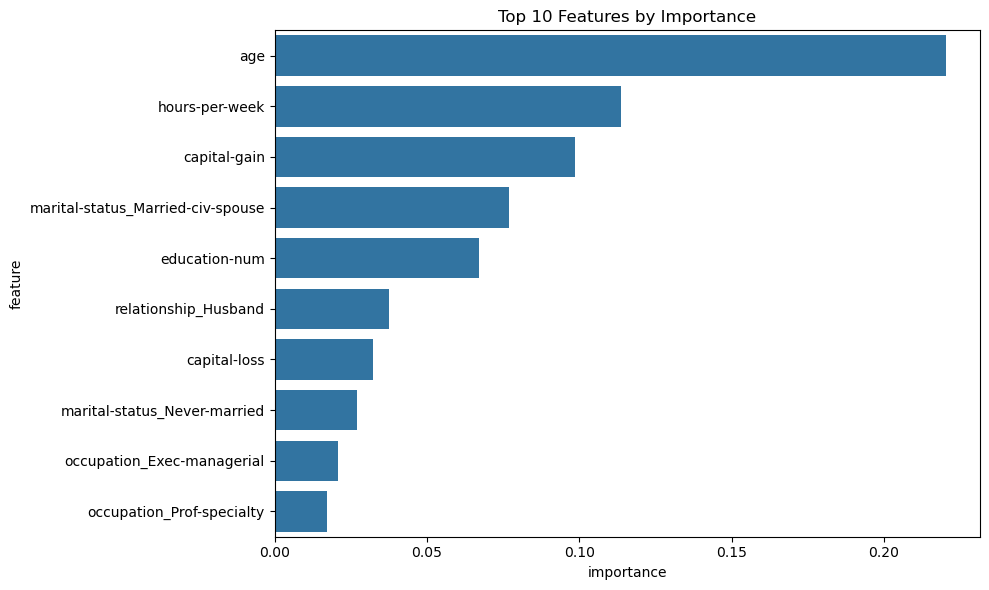

In [31]:
# Top 10 feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.sort_values('importance', ascending=False).head(10))
plt.title('Top 10 Features by Importance')
plt.tight_layout()
plt.show()

f) Using the model from part B, predict for the train data. Look at the classification report for the train data - is there overfitting for the RandomForest model happening?

In [32]:
y_train_pred = rf_model.predict(X_train)
train_report = classification_report(y_train, y_train_pred)

print("\nTraining Data Classification Report:")
print(train_report)


Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     17265
           1       0.97      0.95      0.96      5527

    accuracy                           0.98     22792
   macro avg       0.98      0.97      0.97     22792
weighted avg       0.98      0.98      0.98     22792



In [33]:
print("\nOverfitting Analysis:")
print("Train F1-score vs Test F1-score")
train_f1 = classification_report(y_train, y_train_pred, output_dict=True)['weighted avg']['f1-score']
test_f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
print(f"Train F1: {train_f1:.4f}")
print(f"Test F1: {test_f1:.4f}")
print(f"Difference: {train_f1 - test_f1:.4f}")
print("Conclusion: " + ("Overfitting is occurring" if (train_f1 - test_f1) > 0.05 else "Minimal overfitting"))


Overfitting Analysis:
Train F1-score vs Test F1-score
Train F1: 0.9809
Test F1: 0.8429
Difference: 0.1380
Conclusion: Overfitting is occurring
